# Least square fititng with one parameter less

[Devesh Jawla](jawla@studserv.uni-leipzig.de) (2019)

<a name="top"></a>

* [Introduction](#Introduction)
* [Implementation](#Implementation)
* [Conclusion](#Conclusion)
* [Ising model](#IsingModelExample)
* [Results of Ising model example](#Results)

# Introduction
This is a paper review and python implementation of the original paper titled "Least square fitting with one parameter less" by "Bernd A. Berg". When we have a very limited data set to fit, we can fit it better by eliminating one parameter. The iterations needed to achieve a good fit are also reduced. Moreover reduced $\chi^{2}$ can't be evaluated when the number of parameters are equal to the number of data points, thus a reduction in parameter is required.

The general situation of fitting by $\chi^{2}$ minimization is that m data points with error bars and a fitting function with n parameters is given.

\begin{equation}
\chi^{2}=\sum_{i=1}^{m} \left(\dfrac{y(x_{i};a_{j})-y_{i}}{\Delta y_{i}}\right)^{2}  
\end{equation}

One of the n parameters, say $a_{n}$ can be written as the multiplicative normatlization.

\begin{equation}
y(x;a_{j})=a_{n}f(x,a_{1}\dots,a_{n-1})
\end{equation}

With the parameters $a_{1}\dots,a_{n-1}$ fixed there is a unique solution $c_{0}$ for $c=a_{n}$ which minimizes $\chi^{2}(c)$, so that the function $y(x;a_{j})$ depends only on $n-1$ parameters:

\begin{equation}
y(x;a_{j})=c_{0}(a_{1}\dots,a_{n-1})f(x,a_{1}\dots,a_{n-1})
\end{equation}

This can be exploited to perform least squares fitting with one parameter less.

__Calculation of the normalization constant and it's derivatives__

We begin by minimizing,
 
\begin{equation}
\chi^{2}(c)=\sum_{i=1}^{m} \left(\dfrac{cf(x_{i})-y_{i}}{\Delta y_{i}}\right)^{2} 
\end{equation}

so that the derivative w.r.t. $c$ is 0 at the the minimum $\chi^{2}(c_{0})$. This gives us:
\begin{equation}
c_{0}=\dfrac{r}{s}\\
r=\sum_{i=1}^{m}r_{i}y_{i},r_{i}=\dfrac{f(x_{i})}{(\Delta y_{i})^{2}}\\
s=\sum_{j=1}^{m}\dfrac{f(x_{j})^{2}}{(\Delta y_{j})^{2}}
\end{equation}

For fixed parameters $a_{1}\dots,a_{n-1}$ the error bar $\Delta c_{0}$ of $c_{0}$ follows from the variance of the data points:

\begin{equation}
(\Delta c_{0})^{2}\Big|=s^{-2}\sum_{i=1}^{m}(r_{i}\Delta y_{i})^{2}
\end{equation}

# Implementation

We try to fit the data:

| $\beta_{c}$ | $N_{\tau}(\beta_{c})$ |
|-------------|-----------------------|
| 2.29860     | 4.0000(77)            |
| 2.37136     | 5.0000(86)            |
| 2.42710     | 6.0000(32)            |
| 2.50900     | 8.0000(32)            |

to the function:

\begin{equation}
y=N_{\tau}(\beta_{c})=\dfrac{a_{1}}{f_{\lambda}}\left(1+\dfrac{a_{2}}{\beta}+\dfrac{a_{3}}{\beta^{2}}\right)\\
f_{\lambda}=e^{-1/2b_{0}g^{2}}(b_{0}g^{2})^{-b_{1}/2b_{0}^{2}}\\
g^{2}=4/\beta\\
b_{0}=\dfrac{11}{24\pi^{2}}\\
b_{1}=\dfrac{34}{192\pi^{4}}
\end{equation}

In the implementation below, the fucntion is fit with 1 paramter, 2 parameters and 3 parameters respectively.

Then we eliminate one parameter, and fit with the left over parameters i.e perform a 1 parameter and 2 parameters fit respectively.

__In our python implementation the Curve fit function uses Non-Linear least squares to fit a funciton. It uses Levenberg-Marquardt algorithm by default on unconstrained problems which is the case here. Moreover the reader should note that the derivatives in LM are evaluated numerically.__

Below are the results for fits with all parameters
Parameter 1,
 [0.02534695] 
 Covariance
 [[6.65600735e-10]] 
 Chi-Square=
 1440.8395233423325 


Parameter 1 and 2,
 [-1.575382    0.07463158] 
 Covariance
 [[ 6.83671410e-05 -6.25615900e-06]
 [-6.25615900e-06  5.78235698e-07]] 
 Chi-Square=
 58.505718712758124 


Parameter 1,2 and 3,
 [ 4.68493896 -4.19850068  0.39468983] 
 Covariance
 [[ 0.00679709 -0.00379168  0.00241943]
 [-0.00379168  0.00211756 -0.00135584]
 [ 0.00241943 -0.00135584  0.00087718]] 
 Chi-Square=
 0.1541427502754062 




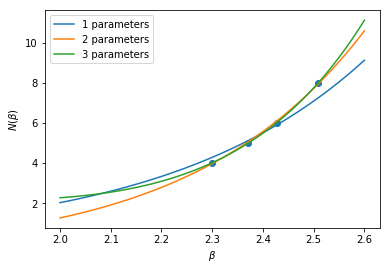

Below are the results for fits with one parameter less
With Nothing left to fit, 1 parameter is 0.025346946899153545 


Parameter 2,
 [-1.575382] 
 Covariance
 [[6.8367146e-05]] 
 Chi-Square=
 39.00381247517161 


Parameter 2 and 3,
 [ 4.68493896 -4.19850068] 
 Covariance
 [[ 0.00679709 -0.00379168]
 [-0.00379168  0.00211756]] 
 Chi-Square=
 0.07707137513747966 




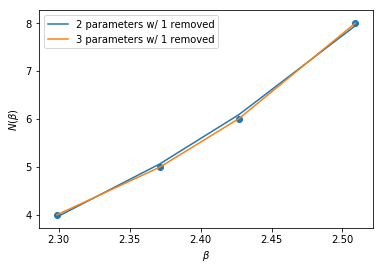

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import timeit

#Data for 1st Example
N_data=np.array([4.0000,5.0000,6.0000,8.0000])
N_data_error=np.array([0.0077,0.0086,0.032,0.014])
beta_c=np.array([2.29860,2.37136,2.42710,2.50900])
x=np.linspace(2.0,2.6,100)

#Data for 2nd Example
N_s=np.array([4,5,6,8,10])
Im_u=np.array([0.087739,0.060978,0.045411,0.028596,0.019996])
Im_u_error=np.array([0.000005,0.000005,0.000005,0.000005,0.000005])
N_s_data=np.linspace(3,11,100)

def f(beta,N=2.0):#SU(N) gauge theory function
    b_0=(N/(16*np.pi*np.pi))*(11.0/3)
    g=(2*N/beta)
    b_1=((N/(16*np.pi*np.pi))**2)*(34.0/3)
    return np.exp(-1/(2*b_0*g))*(b_0*g)**(-b_1/(2*b_0**2))

def chi2(ydata,Nparams,f,*params):#Reduced Chi-Square without y-error
    res = ydata - f(*params)
    redchi2 = sum(res**2)/(len(ydata)-Nparams)
    return res, redchi2

def chi2abs(ydata,yErr,Nparams,f,*params):#Reduced Chi-Square with y-error
    res = ydata - f(*params)
    redchi2 = sum((res/yErr)**2)/(len(ydata)-Nparams)
    return res, redchi2

#fit functions for 1st Example with all parameters
def fit_func_1_par(beta,a):
    return a/f(beta)

def fit_func_2_par(beta,a,b):
    return (b/f(beta))*(1+(a/beta))

def fit_func_3_par(beta,a,b,c):
    return (c/f(beta))*(1+(b/beta)+(a/beta**2))

#fit functions for 1st example with one parameter less
def fit_1_less(beta,a):
    r_1=sum((1/f(beta))*(1+(a/beta))*N_data/N_data_error**2)
    s_1=sum(((1/f(beta))*(1+(a/beta)))**2/N_data_error**2)
    b_1=r_1/s_1
    return (b_1/f(beta))*(1+(a/beta))

def fit_2_less(beta,a,b):
    r_2=sum((1/f(beta))*(1+(b/beta)+(a/beta**2))*N_data/N_data_error**2)
    s_2=sum(((1/f(beta))*(1+(b/beta)+(a/beta**2)))**2/N_data_error**2)
    c_2=r_2/s_2
    return (c_2/f(beta))*(1+(b/beta)+(a/beta**2))

#functions to calculate the parameter 1
def func_0(beta):
    return 1/f(beta)


print('Below are the results for fits with all parameters')
#fitting routine with all parameters

popt_1,pcov_1=curve_fit(fit_func_1_par,beta_c,N_data,sigma=N_data_error,absolute_sigma=True)

r,redchi2 = chi2abs(N_data,N_data_error,1,fit_func_1_par,beta_c,*popt_1)   
print('Parameter 1,\n',popt_1,'\n Covariance\n',pcov_1,'\n Chi-Square=\n',redchi2,'\n\n')
plt.plot(x,fit_func_1_par(x,*popt_1),label='1 parameters')

popt_2,pcov_2=curve_fit(fit_func_2_par,beta_c,N_data,sigma=N_data_error,absolute_sigma=True)

r,redchi2 = chi2abs(N_data,N_data_error,2,fit_func_2_par,beta_c,*popt_2)   
print('Parameter 1 and 2,\n',popt_2,'\n Covariance\n',pcov_2,'\n Chi-Square=\n',redchi2,'\n\n')
plt.plot(x,fit_func_2_par(x,*popt_2),label='2 parameters')

popt_3,pcov_3=curve_fit(fit_func_3_par,beta_c,N_data,sigma=N_data_error,absolute_sigma=True)   

r,redchi2 = chi2abs(N_data,N_data_error,3,fit_func_3_par,beta_c,*popt_3)   
print('Parameter 1,2 and 3,\n',popt_3,'\n Covariance\n',pcov_3,'\n Chi-Square=\n',redchi2,'\n\n')
plt.plot(x,fit_func_3_par(x,*popt_3),label='3 parameters')

plt.scatter(beta_c,N_data)
plt.xlabel(r'$\beta$')
plt.ylabel(r'$N(\beta)$')
plt.legend()
#plt.savefig('Graph of fitting with all parameters.png')
plt.show()

print('Below are the results for fits with one parameter less')


print('With Nothing left to fit, 1 parameter is',sum(func_0(beta_c)*N_data/N_data_error**2)/sum(func_0(beta_c)**2/N_data_error**2),'\n\n')

#fitting routine with one parameter less
popt_4,pcov_4=curve_fit(fit_1_less,beta_c,N_data,sigma=N_data_error,absolute_sigma=True)

r,redchi2 = chi2abs(N_data,N_data_error,1,fit_1_less,beta_c,*popt_4)
#print('For 2 parameter fit with one less, the 1st parameter is',(sum((1/f(beta_c))*(1+(a/beta_c))*N_data/N_data_error**2)/sum((1/f(beta_c))*(1+(a/beta_c))**2/N_data_error**2))) 
print('Parameter 2,\n',popt_4,'\n Covariance\n',pcov_4,'\n Chi-Square=\n',redchi2,'\n\n')
plt.plot(beta_c,fit_1_less(beta_c,*popt_4),label='2 parameters w/ 1 removed')

popt_5,pcov_5=curve_fit(fit_2_less,beta_c,N_data,sigma=N_data_error,absolute_sigma=True)   

r,redchi2 = chi2abs(N_data,N_data_error,2,fit_2_less,beta_c,*popt_5)
#print('For 3 paramter fit with one less, the 1st paramter is',(sum((1/f(beta_c))*(1+(b/beta_c)+(a/beta_c**2))*N_data/N_data_error**2)/sum((1/f(beta_c))*(1+(b/beta_c)+(a/beta_c**2))**2/N_data_error**2)))   
print('Parameter 2 and 3,\n',popt_5,'\n Covariance\n',pcov_5,'\n Chi-Square=\n',redchi2,'\n\n')
plt.plot(beta_c,fit_2_less(beta_c,*popt_5),label='3 parameters w/ 1 removed')

plt.scatter(beta_c,N_data)
plt.xlabel(r'$\beta$')
plt.ylabel(r'$N(\beta)$')
plt.legend()
#plt.savefig('Graph of fitting with one parameter less.png')
plt.show()

Parameter 2 and 3,
 [ 4.57120412 -4.12908966] 
 Covariance
 [[ 0.12069024 -0.07314355]
 [-0.07314355  0.04435365]] 
 Chi-Square=
 1.7694832557440297e-25 




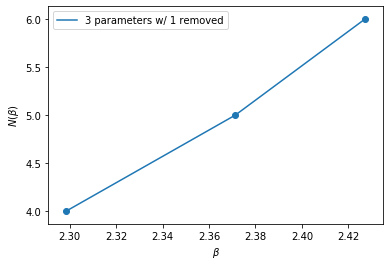

7.938350929549523

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import timeit

#Data for 1st Example
N_data=np.array([4.0000,5.0000,6.0000])
N_data_error=np.array([0.0077,0.0086,0.032])
beta_c=np.array([2.29860,2.37136,2.42710])
x=np.linspace(2.0,2.6,100)

def f(beta,N=2.0):#SU(N) gauge theory function
    b_0=(N/(16*np.pi*np.pi))*(11.0/3)
    g=(2*N/beta)
    b_1=((N/(16*np.pi*np.pi))**2)*(34.0/3)
    return np.exp(-1/(2*b_0*g))*(b_0*g)**(-b_1/(2*b_0**2))

def chi2abs(ydata,yErr,Nparams,f,*params):#Reduced Chi-Square with y-error
    res = ydata - f(*params)
    redchi2 = sum((res/yErr)**2)/(len(ydata)-Nparams)
    return res, redchi2

def fit_2_less(beta,a,b):
    r_2=sum((1/f(beta))*(1+(b/beta)+(a/beta**2))*N_data/N_data_error**2)
    s_2=sum(((1/f(beta))*(1+(b/beta)+(a/beta**2)))**2/N_data_error**2)
    c_2=r_2/s_2
    return (c_2/f(beta))*(1+(b/beta)+(a/beta**2))


popt_115,pcov_115=curve_fit(fit_2_less,beta_c,N_data,sigma=N_data_error,absolute_sigma=True)   
r,redchi2 = chi2abs(N_data,N_data_error,2,fit_2_less,beta_c,*popt_115)
#print('For 3 paramter fit with one less, the 1st paramter is',(sum((1/f(beta_c))*(1+(b/beta_c)+(a/beta_c**2))*N_data/N_data_error**2)/sum((1/f(beta_c))*(1+(b/beta_c)+(a/beta_c**2))**2/N_data_error**2)))   
print('Parameter 2 and 3,\n',popt_115,'\n Covariance\n',pcov_115,'\n Chi-Square=\n',redchi2,'\n\n')
plt.plot(beta_c,fit_2_less(beta_c,*popt_115),label='3 parameters w/ 1 removed')

plt.scatter(beta_c,N_data)
plt.xlabel(r'$\beta$')
plt.ylabel(r'$N(\beta)$')
plt.legend()
#plt.savefig('Graph of fitting with one parameter less.png')
plt.show()

(0.3449427/f(2.50900))*(1+(-4.12908966/2.50900)+(4.57120412/2.50900**2))

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import timeit
y=np.array([4.0000,5.0000,6.0000,8.0000])
yerr=np.array([0.0077,0.0086,0.0032,0.0032])
x=np.array([2.29860,2.37136,2.42710,2.50900])
def f(beta,N=2.0):#SU(N) gauge theory function
    b_0=(N/(16*np.pi*np.pi))*(11.0/3)
    g=(2*N/beta)
    b_1=((N/(16*np.pi*np.pi))**2)*(34.0/3)
    return np.exp(-1/(2*b_0*g))*(b_0*g)**(-b_1/(2*b_0**2))

first=sum(1/(f(x)**2*yerr**2))
second=sum(1/(f(x)**2*yerr**2*x))
third=sum(1/(f(x)**2*yerr**2*x**2))
print(first,second,third)
fourth=sum(y/(f(x)*yerr**2))
fifth=sum(y/(f(x)*x*yerr**2))
print(fourth,fifth)

A=np.array([[first,second],[second,third]])
invA=np.linalg.inv(A)
B=np.array([[fourth],[fifth]])
np.dot(invA,B)

14313195912.373827 5806134474.080589 2356424652.331587
384899964.88117266 155972628.50202394


array([[ 0.082868  ],
       [-0.13799302]])

In [3]:
%timeit sum(func_0(beta_c)*N_data/N_data_error**2)/sum(func_0(beta_c)**2/N_data_error**2)

21.4 µs ± 347 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [4]:
f(beta_c)

array([0.00593516, 0.00494403, 0.00429709, 0.00349549])

In [6]:
%timeit curve_fit(fit_func_1_par,beta_c,N_data,sigma=N_data_error,absolute_sigma=True)

299 µs ± 4.81 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [7]:
%timeit curve_fit(fit_func_2_par,beta_c,N_data,sigma=N_data_error,absolute_sigma=True)

483 µs ± 11.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [8]:
%timeit curve_fit(fit_func_3_par,beta_c,N_data,sigma=N_data_error,absolute_sigma=True)

598 µs ± 11.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [9]:
%timeit curve_fit(fit_1_less,beta_c,N_data,sigma=N_data_error,absolute_sigma=True)

1.19 ms ± 56.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [10]:
%timeit curve_fit(fit_2_less,beta_c,N_data,sigma=N_data_error,absolute_sigma=True)

2.94 ms ± 68.3 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


2 Things to note from the results above are the increasing goodness of fit and the decreasing time taken to fit the functions when one parameter is removed.

__Second Example__

For the second example we fit another set with 5 data points and 4 parameters. This fitting fucntion is non-linear and therefore may have several extremas. Both parameter sets fit perfectly well and give the same results. While for different parameter sets the fit functions diverge quickly. As the reader will see, in the example below, goodness of fit increases as well as the time required to fit the functions when one parameter is removed.

4 parameters,
 [-1.59812598  0.76588829 -2.79990369  0.79169075] 
 Covariance
 [[ 9.18359544e-06 -1.12436875e-03  1.54390729e-03 -1.83632070e-05]
 [-1.12436875e-03  1.46116874e-01 -1.98053415e-01  2.26751903e-03]
 [ 1.54390729e-03 -1.98053415e-01  2.69241443e-01 -3.10832170e-03]
 [-1.83632070e-05  2.26751903e-03 -3.10832170e-03  3.67712354e-05]] 
 Chi-Square= 0.1131993023193 


4 parameters,
 [-4.39802856  1.30567481  2.79990259  0.60634603] 
 Covariance
 [[ 0.27234035  0.33955777 -0.27078726 -0.16008218]
 [ 0.33955777  0.42466148 -0.33764096 -0.20016951]
 [-0.27078726 -0.33764096  0.26924335  0.15917797]
 [-0.16008218 -0.20016951  0.15917797  0.09435334]] 
 Chi-Square= 0.1131993023216254 




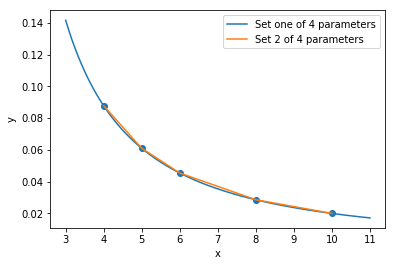

Parameters,
 [-1.59812598  0.76588799 -2.79990329] 
 Covariance
 [[ 9.18295339e-06 -1.12430421e-03  1.54380651e-03]
 [-1.12430421e-03  1.46110908e-01 -1.98043606e-01]
 [ 1.54380651e-03 -1.98043606e-01  2.69225814e-01]] 
 Chi-Square= 0.056599651159779975 


Parameters,
 [-4.398032    1.30567055  2.799906  ] 
 Covariance
 [[ 0.27235388  0.33957457 -0.27080072]
 [ 0.33957457  0.42468235 -0.33765768]
 [-0.27080072 -0.33765768  0.26925674]] 
 Chi-Square= 0.05659965117902445 




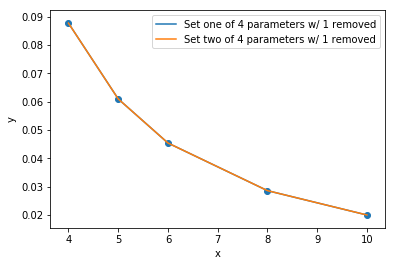

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

x=np.array([4,5,6,8,10])
y=np.array([0.087739,0.060978,0.045411,0.028596,0.019996])
y_error=np.array([0.000005,0.000005,0.000005,0.000005,0.000005])
x_100=np.linspace(3,11,100)

par_set_1=[-1.6,0.1,-1.0,0.8]
par_set_1_less=[-1.6,0.1,-1.0]
par_set_2=[-4.4,1.3,2.8,0.6]
par_set_2_less=[-4.4,1.3,2.8]

def chi2(ydata,Nparams,f,*params):#Reduced Chi-Square without y-error
    res = ydata - f(*params)
    redchi2 = sum(res**2)/(len(ydata)-Nparams)
    return res, redchi2

def chi2abs(ydata,yErr,Nparams,f,*params):#Reduced Chi-Square with y-error
    res = ydata - f(*params)
    redchi2 = sum((res/yErr)**2)/(len(ydata)-Nparams)
    return res, redchi2

def fit_func(N,a,b,c,d):
	return d*(N**a)*(1+b*N**c)

def fit_less(N,a,b,c):
	r_1=sum(1*(N**a)*(1+b*N**c)*y/y_error**2)
	s_1=sum((1*(N**a)*(1+b*N**c))**2/y_error**2)
	d_1=r_1/s_1
	return d_1*(N**a)*(1+b*N**c)

#fitting routine with all parameters
popt_01,pcov_01=curve_fit(fit_func,x,y,p0=par_set_1,sigma=y_error,absolute_sigma=True)
r,redchi2 = chi2abs(y,y_error,4,fit_func,x,*popt_01)   
print('4 parameters,\n',popt_01,'\n Covariance\n',pcov_01,'\n Chi-Square=',redchi2,'\n\n')
plt.plot(x_100,fit_func(x_100,*popt_01),label='Set one of 4 parameters')

popt_02,pcov_02=curve_fit(fit_func,x,y,p0=par_set_2,sigma=y_error,absolute_sigma=True)
r,redchi2 = chi2abs(y,y_error,4,fit_func,x,*popt_02)   
print('4 parameters,\n',popt_02,'\n Covariance\n',pcov_02,'\n Chi-Square=',redchi2,'\n\n')
plt.plot(x,fit_func(x,*popt_02),label='Set 2 of 4 parameters')

plt.scatter(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
#plt.savefig('Graph of fitting with all 4 parameters.png')
plt.show()


#fitting routine with one parameter less
popt_03,pcov_03=curve_fit(fit_less,x,y,p0=par_set_1_less,sigma=y_error,absolute_sigma=True)   
r,redchi2 = chi2abs(y,y_error,3,fit_less,x,*popt_03)
print('Parameters,\n',popt_03,'\n Covariance\n',pcov_03,'\n Chi-Square=',redchi2,'\n\n')
plt.plot(x,fit_less(x,*popt_03),label='Set one of 4 parameters w/ 1 removed')

popt_04,pcov_04=curve_fit(fit_less,x,y,p0=par_set_2_less,sigma=y_error,absolute_sigma=True)   
r,redchi2 = chi2abs(y,y_error,3,fit_less,x,*popt_04)
print('Parameters,\n',popt_04,'\n Covariance\n',pcov_04,'\n Chi-Square=',redchi2,'\n\n')
plt.plot(x,fit_less(x,*popt_04),label='Set two of 4 parameters w/ 1 removed')

plt.scatter(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
#plt.savefig('Graph of fitting 4 with one parameter less.png')
plt.show()

Parameters,
 [-1.59621684  0.62036092 -2.55860426] 
 Covariance
 [[ 5.11297388e-05 -3.26638199e-03  6.17098848e-03]
 [-3.26638199e-03  2.15080470e-01 -4.03022542e-01]
 [ 6.17098848e-03 -4.03022542e-01  7.56906933e-01]] 
 Chi-Square= 1.2037062152420221e-23 


Parameters,
 [-4.1548211   1.61196485  2.55860426] 
 Covariance
 [[ 0.76909308  1.05542583 -0.76287257]
 [ 1.05542583  1.45178927 -1.0469406 ]
 [-0.76287257 -1.0469406   0.75670317]] 
 Chi-Square= 2.1185229388259594e-23 




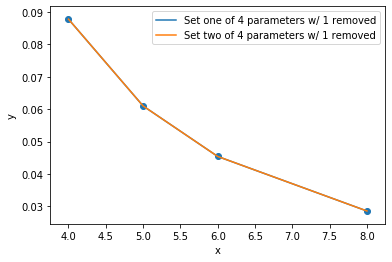

0.020000649245772887

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

x=np.array([4,5,6,8])
y=np.array([0.087739,0.060978,0.045411,0.028596])
y_error=np.array([0.000005,0.000005,0.000005,0.000005])
x_100=np.linspace(3,11,100)

par_set_1=[-1.6,0.1,-1.0,0.8]
par_set_1_less=[-1.6,0.1,-1.0]
par_set_2=[-4.4,1.3,2.8,0.6]
par_set_2_less=[-4.4,1.3,2.8]

def chi2abs(ydata,yErr,Nparams,f,*params):#Reduced Chi-Square with y-error
    res = ydata - f(*params)
    redchi2 = sum((res/yErr)**2)/(len(ydata)-Nparams)
    return res, redchi2

def fit_less(N,a,b,c):
    r_1=sum(1*(N**a)*(1+b*N**c)*y/y_error**2)
    s_1=sum((1*(N**a)*(1+b*N**c))**2/y_error**2)
    d_1=r_1/s_1
    return d_1*(N**a)*(1+b*N**c)

#fitting routine with one parameter less
popt_003,pcov_003=curve_fit(fit_less,x,y,p0=par_set_1_less,sigma=y_error,absolute_sigma=True)   
r,redchi2 = chi2abs(y,y_error,3,fit_less,x,*popt_003)
print('Parameters,\n',popt_003,'\n Covariance\n',pcov_003,'\n Chi-Square=',redchi2,'\n\n')
plt.plot(x,fit_less(x,*popt_003),label='Set one of 4 parameters w/ 1 removed')

popt_004,pcov_004=curve_fit(fit_less,x,y,p0=par_set_2_less,sigma=y_error,absolute_sigma=True)   
r,redchi2 = chi2abs(y,y_error,3,fit_less,x,*popt_004)
print('Parameters,\n',popt_004,'\n Covariance\n',pcov_004,'\n Chi-Square=',redchi2,'\n\n')
plt.plot(x,fit_less(x,*popt_004),label='Set two of 4 parameters w/ 1 removed')

plt.scatter(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
#plt.savefig('Graph of fitting 4 with one parameter less.png')
plt.show()

0.7879835293925185*(10.0**-1.59621684)*(1+0.62036092*10.0**-2.55860426)

In [27]:
%timeit curve_fit(fit_func,x,y,p0=par_set_1,sigma=y_error,absolute_sigma=True)

1.69 ms ± 26.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [28]:
%timeit curve_fit(fit_func,x,y,p0=par_set_2,sigma=y_error,absolute_sigma=True)

485 µs ± 11.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [29]:
%timeit curve_fit(fit_less,x,y,p0=par_set_1_less,sigma=y_error,absolute_sigma=True)

3.1 ms ± 22.7 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [30]:
%timeit curve_fit(fit_less,x,y,p0=par_set_2_less,sigma=y_error,absolute_sigma=True)

767 µs ± 24.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


Parameter 1,2 and 3,
 [ 2.01564287 -1.79560166  0.42343402] 
 Covariance
 [[ 0.00544799 -0.00448028  0.0009205 ]
 [-0.00448028  0.00368531 -0.00075734]
 [ 0.0009205  -0.00075734  0.00015567]] 
 Chi-Square=
 1.4972497910487181 




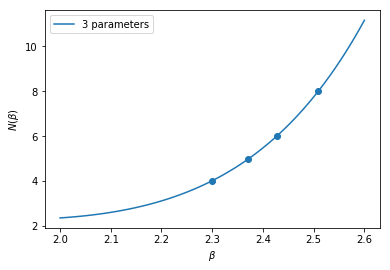

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

#Data for 1st Example
N_data=np.array([4.0000,5.0000,6.0000,8.0000])
N_data_error=np.array([0.0077,0.0086,0.0032,0.0032])
beta_c=np.array([2.29860,2.37136,2.42710,2.50900])
x=np.linspace(2.0,2.6,100)

def f(beta,N=2.0):#SU(N) gauge theory function
    b_0=(N/(16*np.pi*np.pi))*(11.0/3)
    g=(2*N/beta)
    b_1=((N/(16*np.pi*np.pi))**2)*(34.0/3)
    return np.exp(-1/(2*b_0*g))*(b_0*g)**(-b_1/(2*b_0**2))

def chi2abs(ydata,yErr,Nparams,f,*params):#Reduced Chi-Square with y-error
    res = ydata - f(*params)
    redchi2 = sum((res/yErr)**2)/(len(ydata)-Nparams)
    return res, redchi2

def fit_func_3_par_new(beta,a,b,c):
    return (c/f(beta))+(b/(f(beta)*beta))+(a/(f(beta)*beta**2))

def fit_2_less_new(beta,a,b):
    r_2=sum(((1/f(beta))+(b/(f(beta)*beta))+(a/(f(beta)*beta**2)))*N_data/N_data_error**2)
    s_2=sum(((1/f(beta))+(b/(f(beta)*beta))+(a/(f(beta)*beta**2)))**2/N_data_error**2)
    c_2=r_2/s_2
    return (c_2/f(beta))+(b/(f(beta)*beta))+(a/(f(beta)*beta**2))

popt_7,pcov_7=curve_fit(fit_func_3_par_new,beta_c,N_data,sigma=N_data_error,absolute_sigma=True)   
r,redchi2 = chi2abs(N_data,N_data_error,3,fit_func_3_par_new,beta_c,*popt_7)   
print('Parameter 1,2 and 3,\n',popt_7,'\n Covariance\n',pcov_7,'\n Chi-Square=\n',redchi2,'\n\n')
plt.plot(x,fit_func_3_par_new(x,*popt_7),label='3 parameters')

plt.scatter(beta_c,N_data)
plt.xlabel(r'$\beta$')
plt.ylabel(r'$N(\beta)$')
plt.legend()
#plt.savefig('Graph of fitting with all parameters.png')
plt.show()


In [18]:
%timeit curve_fit(fit_func_3_par_new,beta_c,N_data,sigma=N_data_error,absolute_sigma=True)

852 µs ± 16.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [16]:
-1.79560166/0.42343402 #this gives a_2

-4.240570136523277

In [17]:
2.01564287/0.42343402 #a_1

4.760228925394327

# Conclusion

The results obtained are summarised in the tables below.

__1st Example with all paramters__

|   $a_{1}$   |   $a_{2}$   |  $a_{3}$  | $\chi^{2}$ | Micro-Sec. |
|:-----------:|:-----------:|:---------:|:----------:|:----------:|
|  0.026891   |      NA     |     NA    |   7686.01  |     289    |
| -1.665214   |  0.082868   |     NA    |   373.62   |     493    |
|  4.760228   | -4.240570   | 0.423434  |    1.49    |     598    |

__1st Example with one parameter less__

|   $a_{1}$   |   $a_{2}$   |  $a_{3}$  | $\chi^{2}$ | Micro-Sec. |
|:-----------:|:-----------:|:---------:|:----------:|:----------:|
|  0.026891   |      NA     |     NA    |     NA     |    21.4    |
| -1.665214   |  0.082868   |     NA    |   249.08   |    1190    |
|  4.760228   | -4.240570   | 0.423434  |    0.74    |    2940    |
|  4.57120412 | -4.12908966 |           |1 less data |            |

__2nd example with 2 parameter sets and with and without one parameter__

|   $a_{1}$   |   $a_{2}$   |   $a_{3}$   |   $a_{4}$  | $\chi^{2}$ | Micro-Sec. |
|:-----------:|:-----------:|:-----------:|:----------:|:----------:|:----------:|
| -1.59812598 | 0.76588841  | -2.79990386 | 0.79169075 |  0.1       |    1700    |
| -4.39803103 |  1.30567176 |  2.79990504 | 0.60634747 |  0.1       |     485    |
| -1.59812598 |  0.76588834 | -2.79990376 |     NA     |  0.05      |    3100    |
| -4.39802646 |  1.30567747 |  2.7999005  |     NA     |  0.05      |     767    |
|-4.1548211   |1.61196485   |2.55860426   |            |1 less data |            |

__1st example made linear in parameters__

|  $a_{1}$  |  $a_{2}$  |  $a_{3}$ | $\chi^{2}$ | Micro-Sec. |
|:---------:|:---------:|:--------:|:----------:|:----------:|
|  4.760228 | -4.240570 | 0.423434 |    1.49    |     852    |

The results above are obtained with the data set from the Berg B.A.'s paper. They differ significantly and to be sure that there wansn't any inaccuracy in my numerical results, I calculated explicitly the solution for the 2 parameter problem by solving the system of equations and the exact results match the numerical results upto last significant digit.

Key takeaway however is that it took less time to fit all parameters as compared to one parameter less. Since the first exmaple can be written linear in parameters, we observe that doing this also reduces the time it takes to fit, with accurate and precise results.

We can see from the results above that the fits are good enough and they signal consistency. This shows that we can exclude the multiplicative normalization of a fitting function from the variable parameters of a $\chi^{2}$ minimization and include it into the fitting function (it still counts when it comes to determining the degrees of freedom). Our simple examples show that one of the parameters can be evaluated without fitting and the other parameters can be evaulated accurately.

To know why out results didn't match, we looked at the code used by Berg and found that he used different error bars. The error bars in the paper differ from the ones(detailed below) actually used in the first example by Berg B.A. in his code.

| $\beta_{c}$ | $N_{\tau}(\beta_{c})$ |
|-------------|-----------------------|
| 2.29860     | 4.0000(77)            |
| 2.37136     | 5.0000(86)            |
| 2.42710     | 6.0000(320)           |
| 2.50900     | 8.0000(140)           |

And this gives the matching values for all parameters as in the original paper.

We can see that when the degree of freedom are small the reduced chi square indicates overfitting. It is accepted empirically that when we have less than roughly 12 data points the Chi-square is not a reliable indicator of goodness of fit, moreover both examples have only 1 degree of freedom and it doubles when 1 parameter is removed and therefore chi-square is more so irrelevant. Curve Fitting should not be confused with Regression. They both involve approximating data with functions. But the goal of Curve-fitting is to get the values for a Dataset through which a given set of explanatory variables can actually depict another variable. Regression is a special case of curve fitting but here you just don’t need a curve which fits the training data in the best possible way(which may lead to overfitting) but a model which is able to generalize the learning and thus predict new points efficiently.

For the case when the number of data points match the number of parameters, we employ our one parameter less fitting for which I noticed that keeping the degree of freedom constant, if we reduce the number of data points by one and then use the one parameter less fitting the values for the parameter are roughly the same but the very small chi-square indicates over-fitting. Therefore the reduced chi square indicates over-fitting when one parameter is removed which gets severe when the not only the degrees of freedom are less but also when the number of data points are less.

1st example\
Predicted value = 7.9384(616) with 0.77% error\
True value 8.0000(140)\

2nd example\
Predicted value0.020001(5) with 0.025% error\
True value 0.019996(5)\

# IsingModelExample

In [2]:
import pandas as pd
df = pd.read_csv('data.csv')
df

,L,beta_cmax,beta_bmin,beta_eqw,beta_eqh,beta_cmax_err,beta_bmin_err,beta_eqw_err,beta_eqh_err
0,8,0.518228,0.513850,0.518244,0.514007,0.000026,0.000027,0.000026,0.000023
1,9,0.524636,0.521626,0.524644,0.521769,0.000024,0.000024,0.000024,0.000024
2,10,0.529322,0.527159,0.529327,0.527463,0.000018,0.000019,0.000018,0.000018
3,11,0.532894,0.531286,0.532897,0.531705,0.000013,0.000013,0.000013,0.000012
4,12,0.535696,0.534467,0.535698,0.534965,0.000013,0.000013,0.000013,0.000013
5,13,0.537902,0.536941,0.537903,0.537383,0.000012,0.000012,0.000012,0.000012
6,14,0.539662,0.538897,0.539663,0.539297,0.000010,0.000010,0.000010,0.000009
7,15,0.541128,0.540508,0.541128,0.540853,0.000009,0.000009,0.000009,0.000009
8,16,0.542329,0.541820,0.542329,0.542114,0.000010,0.000010,0.000010,0.000009
9,17,0.543326,0.542903,0.543326,0.543151,0.000008,0.000008,0.000008,0.000008


In [3]:
beta_cmax=df['beta_cmax'].values
L=df['L'].values
beta_cmax_err=df['beta_cmax_err'].values
beta_bmin=df['beta_bmin'].values
beta_bmin_err=df['beta_bmin_err'].values
beta_eqw=df['beta_eqw'].values
beta_eqw_err=df['beta_eqw_err'].values
beta_eqh=df['beta_eqh'].values
beta_eqh_err=df['beta_eqh_err'].values

542 µs ± 19.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)

 Chi-Square=
 0.713892294408571 




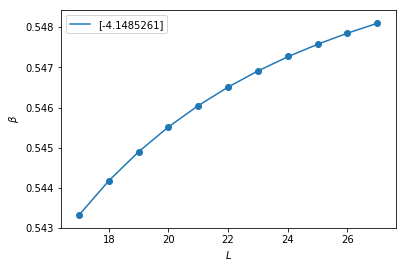

555 µs ± 22.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)

 Chi-Square=
 0.6129255321658399 




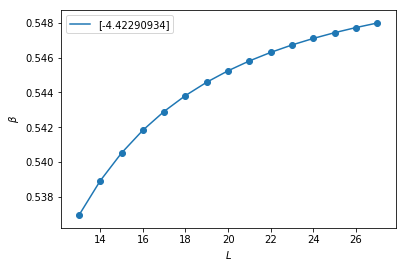

512 µs ± 11.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)

 Chi-Square=
 0.6690324704414257 




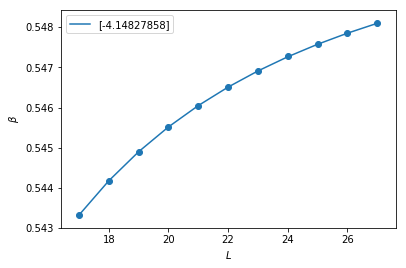

593 µs ± 64.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)

 Chi-Square=
 0.4556830219117417 




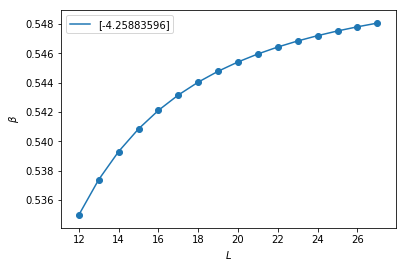

1.13 ms ± 75.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)

 Chi-Square=
 0.7279993639157631 




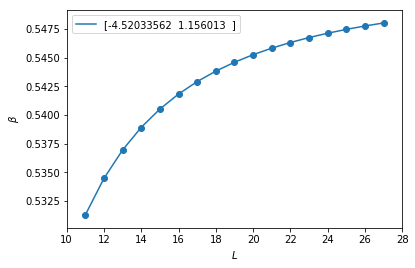

1.34 ms ± 136 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)

 Chi-Square=
 0.4698038752689104 




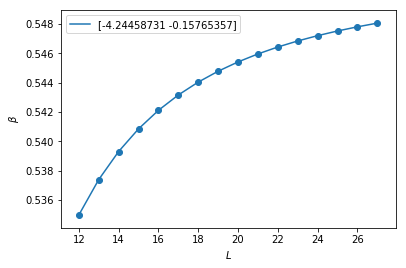

922 µs ± 19.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)

 Chi-Square=
 0.4493519053516687 




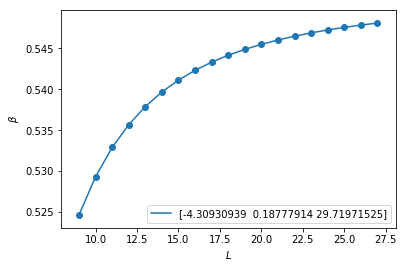

936 µs ± 27.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)

 Chi-Square=
 0.45737251158760567 




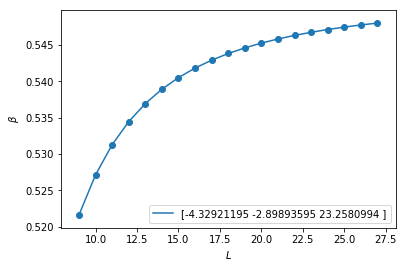

935 µs ± 23.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)

 Chi-Square=
 0.4491467173037228 




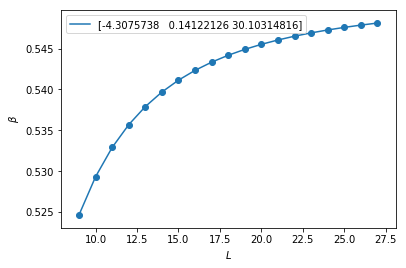

1.26 ms ± 20.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)

 Chi-Square=
 0.38933099775347063 




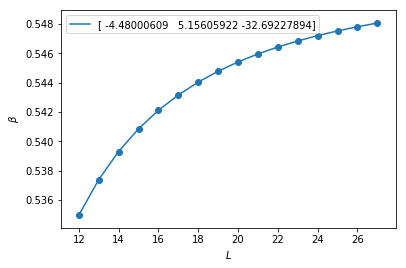

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import timeit

def chi2abs(ydata,yErr,Nparams,f,*params):#Reduced Chi-Square with y-error
    res = ydata - f(*params)
    redchi2 = sum((res/yErr)**2)/(len(ydata)-Nparams)
    return res, redchi2

def beta(L,a,b,c,d):
    return a+(b/L**2)+(c/L**3)+(d/L**4)

def beta_less(L,ydata,yerr,a,b,c):
    r=sum((1+(a/L**2)+(b/L**3)+(c/L**4))*ydata/yerr**2)
    s=sum((1+(a/L**2)+(b/L**3)+(c/L**4))**2/yerr**2)
    d=r/s
    return d*(1+(a/L**2)+(b/L**3)+(c/L**4))

def beta_2(L,a,b):
    return a+(b/L**2)

def beta_2_less(L,ydata,yerr,a):
    r=sum((1+(a/L**2))*ydata/yerr**2)
    s=sum((1+(a/L**2))**2/yerr**2)
    b=r/s
    #print(b)
    return b*(1+(a/L**2))

def beta_3(L,a,b,c):
    return a+(b/L**2)+(c/L**3)

def beta_3_less(L,ydata,yerr,a,b):
    r=sum((1+(a/L**2)+(b/L**3))*ydata/yerr**2)
    s=sum((1+(a/L**2)+(b/L**3))**2/yerr**2)
    c=r/s
    return c*(1+(a/L**2)+(b/L**3))
    
def fit_1(x,ydata,yerr):
    popt,pcov=curve_fit(lambda x, a : beta_2_less(x, ydata, yerr,a), x, ydata,sigma=yerr,absolute_sigma=True)
    %timeit curve_fit(lambda x, a : beta_2_less(x, ydata, yerr,a), x, ydata,sigma=yerr,absolute_sigma=True)
    r,redchi2 = chi2abs(ydata,yerr,1,beta_2_less,x,ydata,yerr,*popt)
    print('\n Chi-Square=\n',redchi2,'\n\n')
    plt.plot(x,beta_2_less(x, ydata, yerr,*popt),label='%s'%popt)
    plt.scatter(x,ydata)
    plt.xlabel(r'$L$')
    plt.ylabel(r'$\beta$')
    plt.legend()
    #plt.savefig('Graph of fitting with all parameters.png')
    plt.show()
    return None

fit_1(L[9:],beta_cmax[9:],beta_cmax_err[9:])
fit_1(L[5:],beta_bmin[5:],beta_bmin_err[5:])
fit_1(L[9:],beta_eqw[9:],beta_eqw_err[9:])
fit_1(L[4:],beta_eqh[4:],beta_eqh_err[4:])

def fit_2(x,ydata,yerr):
    popt,pcov=curve_fit(lambda x, a,b : beta_3_less(x, ydata, yerr,a,b), x, ydata,sigma=yerr,absolute_sigma=True)
    %timeit curve_fit(lambda x, a,b : beta_3_less(x, ydata, yerr,a,b), x, ydata,sigma=yerr,absolute_sigma=True)
    r,redchi2 = chi2abs(ydata,yerr,2,beta_3_less,x,ydata,yerr,*popt)
    print('\n Chi-Square=\n',redchi2,'\n\n')
    plt.plot(x,beta_3_less(x, ydata, yerr,*popt),label='%s'%popt)
    plt.scatter(x,ydata)
    plt.xlabel(r'$L$')
    plt.ylabel(r'$\beta$')
    plt.legend()
    #plt.savefig('Graph of fitting with all parameters.png')
    plt.show()
    return None

fit_2(L[3:],beta_bmin[3:],beta_bmin_err[3:])
fit_2(L[4:],beta_eqh[4:],beta_eqh_err[4:])

def fit_3(x,ydata,yerr):
    popt,pcov=curve_fit(lambda x, a,b,c : beta_less(x, ydata, yerr,a,b,c), x, ydata,sigma=yerr,absolute_sigma=True)
    %timeit curve_fit(lambda x, a,b : beta_3_less(x, ydata, yerr,a,b), x, ydata,sigma=yerr,absolute_sigma=True)
    r,redchi2 = chi2abs(ydata,yerr,3,beta_less,x,ydata,yerr,*popt)
    print('\n Chi-Square=\n',redchi2,'\n\n')
    plt.plot(x,beta_less(x, ydata, yerr,*popt),label='%s'%popt)
    plt.scatter(x,ydata)
    plt.xlabel(r'$L$')
    plt.ylabel(r'$\beta$')
    plt.legend()
    #plt.savefig('Graph of fitting with all parameters.png')
    plt.show()
    return None

fit_3(L[1:],beta_cmax[1:],beta_cmax_err[1:])
fit_3(L[1:],beta_bmin[1:],beta_bmin_err[1:])
fit_3(L[1:],beta_eqw[1:],beta_eqw_err[1:])
fit_3(L[4:],beta_eqh[4:],beta_eqh_err[4:])

378 µs ± 18.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)

 Chi-Square=
 0.7932136604552259 




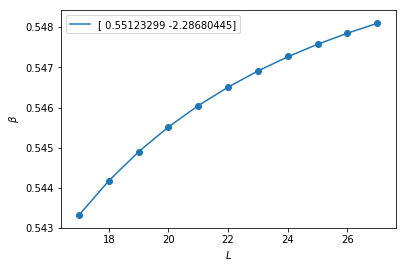

365 µs ± 10.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)

 Chi-Square=
 0.6600736500263353 




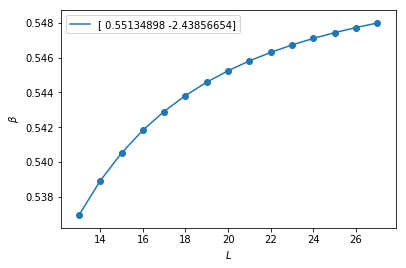

378 µs ± 9.49 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)

 Chi-Square=
 0.7433694115953918 




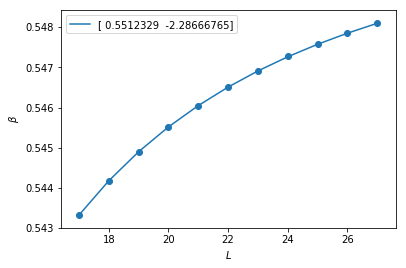

371 µs ± 8.07 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)

 Chi-Square=
 0.48823180918943304 




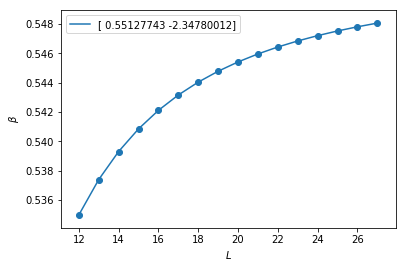

460 µs ± 12.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)

 Chi-Square=
 0.7799993155207312 




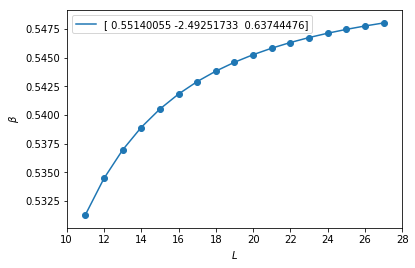

471 µs ± 17 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)

 Chi-Square=
 0.5059426547819984 




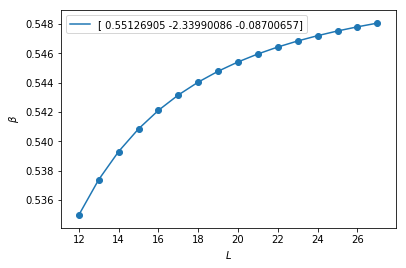

1.01 ms ± 27.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)

 Chi-Square=
 0.479308527107343 




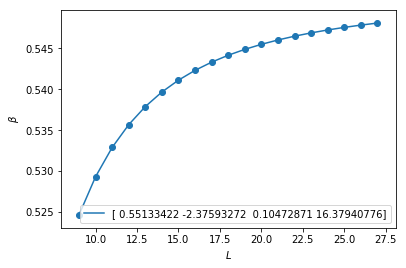

714 µs ± 18.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)

 Chi-Square=
 0.48786401261490947 




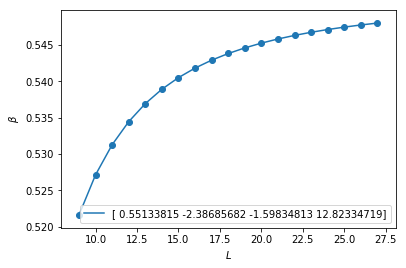

964 µs ± 24.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)

 Chi-Square=
 0.4790846184358368 




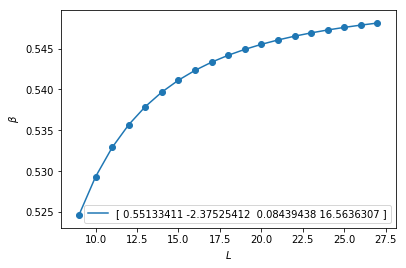

881 µs ± 42.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)

 Chi-Square=
 0.42177523673561007 




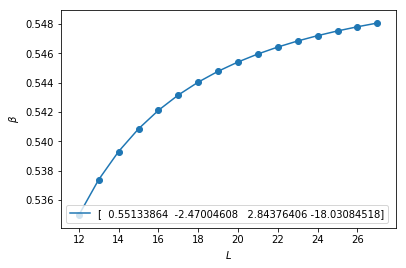

In [40]:
popt_1,pcov_1=curve_fit(beta_2,L[9:],beta_cmax[9:],sigma=beta_cmax_err[9:],absolute_sigma=True)
%timeit curve_fit(beta_2,L[9:],beta_cmax[9:],sigma=beta_cmax_err[9:],absolute_sigma=True)
r,redchi2 = chi2abs(beta_cmax[9:],beta_cmax_err[9:],2,beta_2,L[9:],*popt_1)   
print('\n Chi-Square=\n',redchi2,'\n\n')
plt.plot(L[9:],beta_2(L[9:],*popt_1),label='%s'%popt_1)
plt.scatter(L[9:],beta_cmax[9:])
plt.xlabel(r'$L$')
plt.ylabel(r'$\beta$')
plt.legend()
#plt.savefig('Graph of fitting with all parameters.png')
plt.show()

popt_2,pcov_2=curve_fit(beta_2,L[5:],beta_bmin[5:],sigma=beta_bmin_err[5:],absolute_sigma=True)
%timeit curve_fit(beta_2,L[5:],beta_bmin[5:],sigma=beta_bmin_err[5:],absolute_sigma=True)
r,redchi2 = chi2abs(beta_bmin[5:],beta_bmin_err[5:],2,beta_2,L[5:],*popt_2)   
print('\n Chi-Square=\n',redchi2,'\n\n')
plt.plot(L[5:],beta_2(L[5:],*popt_2),label='%s'%popt_2)
plt.scatter(L[5:],beta_bmin[5:])
plt.xlabel(r'$L$')
plt.ylabel(r'$\beta$')
plt.legend()
#plt.savefig('Graph of fitting with all parameters.png')
plt.show()

popt_3,pcov_3=curve_fit(beta_2,L[9:],beta_eqw[9:],sigma=beta_eqw_err[9:],absolute_sigma=True)
%timeit curve_fit(beta_2,L[9:],beta_eqw[9:],sigma=beta_eqw_err[9:],absolute_sigma=True)
r,redchi2 = chi2abs(beta_eqw[9:],beta_eqw_err[9:],2,beta_2,L[9:],*popt_3)   
print('\n Chi-Square=\n',redchi2,'\n\n')
plt.plot(L[9:],beta_2(L[9:],*popt_3),label='%s'%popt_3)
plt.scatter(L[9:],beta_eqw[9:])
plt.xlabel(r'$L$')
plt.ylabel(r'$\beta$')
plt.legend()
#plt.savefig('Graph of fitting with all parameters.png')
plt.show()

popt_4,pcov_4=curve_fit(beta_2,L[4:],beta_eqh[4:],sigma=beta_eqh_err[4:],absolute_sigma=True)
%timeit curve_fit(beta_2,L[4:],beta_eqh[4:],sigma=beta_eqh_err[4:],absolute_sigma=True)
r,redchi2 = chi2abs(beta_eqh[4:],beta_eqh_err[4:],2,beta_2,L[4:],*popt_4)   
print('\n Chi-Square=\n',redchi2,'\n\n')
plt.plot(L[4:],beta_2(L[4:],*popt_4),label='%s'%popt_4)
plt.scatter(L[4:],beta_eqh[4:])
plt.xlabel(r'$L$')
plt.ylabel(r'$\beta$')
plt.legend()
#plt.savefig('Graph of fitting with all parameters.png')
plt.show()

popt_5,pcov_5=curve_fit(beta_3,L[3:],beta_bmin[3:],sigma=beta_bmin_err[3:],absolute_sigma=True)
%timeit curve_fit(beta_3,L[3:],beta_bmin[3:],sigma=beta_bmin_err[3:],absolute_sigma=True)
r,redchi2 = chi2abs(beta_bmin[3:],beta_bmin_err[3:],3,beta_3,L[3:],*popt_5)   
print('\n Chi-Square=\n',redchi2,'\n\n')
plt.plot(L[3:],beta_3(L[3:],*popt_5),label='%s'%popt_5)
plt.scatter(L[3:],beta_bmin[3:])
plt.xlabel(r'$L$')
plt.ylabel(r'$\beta$')
plt.legend()
#plt.savefig('Graph of fitting with all parameters.png')
plt.show()

popt_6,pcov_6=curve_fit(beta_3,L[4:],beta_eqh[4:],sigma=beta_eqh_err[4:],absolute_sigma=True)
%timeit curve_fit(beta_3,L[4:],beta_eqh[4:],sigma=beta_eqh_err[4:],absolute_sigma=True)
r,redchi2 = chi2abs(beta_eqh[4:],beta_eqh_err[4:],3,beta_3,L[4:],*popt_6)   
print('\n Chi-Square=\n',redchi2,'\n\n')
plt.plot(L[4:],beta_3(L[4:],*popt_6),label='%s'%popt_6)
plt.scatter(L[4:],beta_eqh[4:])
plt.xlabel(r'$L$')
plt.ylabel(r'$\beta$')
plt.legend()
#plt.savefig('Graph of fitting with all parameters.png')
plt.show()

popt_7,pcov_7=curve_fit(beta,L[1:],beta_cmax[1:],sigma=beta_cmax_err[1:],absolute_sigma=True)
%timeit curve_fit(beta,L[1:],beta_cmax[1:],sigma=beta_cmax_err[1:],absolute_sigma=True)
r,redchi2 = chi2abs(beta_cmax[1:],beta_cmax_err[1:],4,beta,L[1:],*popt_7)   
print('\n Chi-Square=\n',redchi2,'\n\n')
plt.plot(L[1:],beta(L[1:],*popt_7),label='%s'%popt_7)
plt.scatter(L[1:],beta_cmax[1:])
plt.xlabel(r'$L$')
plt.ylabel(r'$\beta$')
plt.legend()
#plt.savefig('Graph of fitting with all parameters.png')
plt.show()

popt_8,pcov_8=curve_fit(beta,L[1:],beta_bmin[1:],sigma=beta_bmin_err[1:],absolute_sigma=True)
%timeit curve_fit(beta,L[1:],beta_bmin[1:],sigma=beta_bmin_err[1:],absolute_sigma=True)
r,redchi2 = chi2abs(beta_bmin[1:],beta_bmin_err[1:],4,beta,L[1:],*popt_8)   
print('\n Chi-Square=\n',redchi2,'\n\n')
plt.plot(L[1:],beta(L[1:],*popt_8),label='%s'%popt_8)
plt.scatter(L[1:],beta_bmin[1:])
plt.xlabel(r'$L$')
plt.ylabel(r'$\beta$')
plt.legend()
#plt.savefig('Graph of fitting with all parameters.png')
plt.show()

popt_9,pcov_9=curve_fit(beta,L[1:],beta_eqw[1:],sigma=beta_eqw_err[1:],absolute_sigma=True)
%timeit curve_fit(beta,L[1:],beta_eqw[1:],sigma=beta_eqw_err[1:],absolute_sigma=True)
r,redchi2 = chi2abs(beta_eqw[1:],beta_eqw_err[1:],4,beta,L[1:],*popt_9)   
print('\n Chi-Square=\n',redchi2,'\n\n')
plt.plot(L[1:],beta(L[1:],*popt_9),label='%s'%popt_9)
plt.scatter(L[1:],beta_eqw[1:])
plt.xlabel(r'$L$')
plt.ylabel(r'$\beta$')
plt.legend()
#plt.savefig('Graph of fitting with all parameters.png')
plt.show()

popt_10,pcov_10=curve_fit(beta,L[4:],beta_eqh[4:],sigma=beta_eqh_err[4:],absolute_sigma=True)
%timeit curve_fit(beta,L[4:],beta_eqh[4:],sigma=beta_eqh_err[4:],absolute_sigma=True)
r,redchi2 = chi2abs(beta_eqh[4:],beta_eqh_err[4:],4,beta,L[4:],*popt_10)   
print('\n Chi-Square=\n',redchi2,'\n\n')
plt.plot(L[4:],beta(L[4:],*popt_10),label='%s'%popt_10)
plt.scatter(L[4:],beta_eqh[4:])
plt.xlabel(r'$L$')
plt.ylabel(r'$\beta$')
plt.legend()
#plt.savefig('Graph of fitting with all parameters.png')
plt.show()

# Results

|      | All parameters      |      | One parameter less  |
|------|---------------------|------|---------------------|
| Time | Chi Square          | Time | Chi Square          |
| 378  | 0.7932136604552259  | 542  | 0.713892294408571   |
| 365  | 0.6600736500263353  | 555  | 0.6129255321658399  |
| 378  | 0.7433694115953918  | 512  | 0.6690324704414257  |
| 371  | 0.48823180918943304 | 593  | 0.4556830219117417  |
| 460  | 0.7799993155207312  | 1130 | 0.7279993639157631  |
| 471  | 0.5059426547819984  | 1340 | 0.4698038752689104  |
| 1010 | 0.479308527107343   | 922  | 0.4493519053516687  |
| 714  | 0.48786401261490947 | 936  | 0.45737251158760567 |
| 964  | 0.4790846184358368  | 935  | 0.4491467173037228  |
| 881  | 0.42177523673561007 | 1260 | 0.38933099775347063 |

As it can been seen from the table above, when fitting all parameters the process on average took less time and is also a better fit. On the other hand, fitting with one parameter less took more time and the Chi square values are all smaller indicating an overfit.